# WeatherPy
----

#### Author: Byron Pineda

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Observations:

These observations were made prior to running it one last time as the cities are random!

Temperature (F) vs. Latitude - As the Latitude is increasing between 0 and 40 the temperatures are around 90 degrees. And with decreasing latitude down to -60 the temperature goes down to 35F. When the latitude goes above 40 the temperature also decreases.

Humidity (%) vs. Latitude - Most of the humidity is clustered between -40 to 60 latitude points and most of the humidity is between 50 percent and 90 percent.

Cloudiness (%) vs. Latitude - There does not look to be anything much to interpret here as the points are so scattered.

Wind Speed (mph) vs. Latitude - The wind speed tends to be clustered between 2 mph and 10 mph across the latitude spanning from -40 to 70.+

-----------------------------------------------------------------------------------------------------------------------

In each graph below linear regression was run.  In each case the R-squared value was so low that a relationship between each of the variables in the graphs was almost non-existent.

Northern Hemisphere - Temperature (F) vs. Latitude: The r-squared is: 0.39306815254426325

Southern Hemisphere - Temperature (F) vs. Latitude: The r-squared is: 0.586606046029456

Northern Hemisphere - Humidity (%) vs. Latitude: The r-squared is: 0.0048415991416849175

Southern Hemisphere - Humidity (%) vs. Latitude: The r-squared is: 0.013135269463919226

Northern Hemisphere - Cloudiness (%) vs. Latitude: The r-squared is: 0.008855732490045726

Southern Hemisphere - Cloudiness (%) vs. Latitude: The r-squared is: 0.0018824705270874982

Northern Hemisphere - Wind Speed (mph) vs. Latitude: The r-squared is: 3.534156388902969e-05

Southern Hemisphere - Wind Speed (mph) vs. Latitude: The r-squared is: 0.02656269787764726

##### Please note that all images are located in the Images folder \Python-API-challenge\Images


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


595

In [4]:
# Create a DataFrame to store the cities and other information
df_countries_weather = pd.DataFrame({'City': cities})

# Add the other needed lists 
df_countries_weather['Lat'] = ""
df_countries_weather['Lng'] = ""
df_countries_weather['Max Temp'] = ""
df_countries_weather['Humidity'] = ""
df_countries_weather['Cloudiness'] = ""
df_countries_weather['Wind Speed'] = ""
df_countries_weather['Country'] = ""
df_countries_weather['Date'] = ""

df_countries_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,,,,,,,,
1,busselton,,,,,,,,
2,mar del plata,,,,,,,,
3,bluff,,,,,,,,
4,bethel,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?" 
units = "imperial"

# keeps count of those cities whose weather information is successfully retrieved
cities_cnt = 0

# Keep count of the API calls.
calls_to_api = 1 

# counter to count the number of call sets of 50
sets_of_50 = 0 

#loop through all rows and fill in values for blank columns in dataframe

for index, row in df_countries_weather.iterrows():
    city_name = row['City']
    
    # The targeted API call for all the Cities in the list. 
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city_name + "&units=" + units
    
    city_wthr = requests.get(query_url).json()
        
    try:
        df_countries_weather.loc[index,'Lat'] = city_wthr['coord']['lat']
        df_countries_weather.loc[index,'Lng'] = city_wthr['coord']['lon']
        df_countries_weather.loc[index,'Max Temp'] = city_wthr['main']['temp_max']
        df_countries_weather.loc[index,'Humidity'] = city_wthr['main']['humidity']
        df_countries_weather.loc[index,'Cloudiness'] = city_wthr['clouds']['all']
        df_countries_weather.loc[index,'Wind Speed'] = city_wthr['wind']['speed']
        df_countries_weather.loc[index,'Country'] = city_wthr['sys']['country']
        df_countries_weather.loc[index, 'Date'] = city_wthr['dt']
        
        # Print the log for each city successfully processed.
        print(f'Processing Record {calls_to_api} of Set # {sets_of_50} | {city_name}' )
        
        # Increment if you successfully retrieve weather information for a city.
        cities_cnt += 1 
    
    except KeyError:
        # If the city cannot be processed send a message and continue.
        print(f"Missing weather information for {city_name} ... skipping")
    
    calls_to_api += 1  
    
    # loop to limit 50 API calls per minute as there is an API 
    # limit on the number of calls per minute
    
    if calls_to_api > 50: 
        time.sleep(1)
        
        # Reset it for next 50 calls
        calls_to_api = 1 
        
        # Increment which set of 50 calls you are on.
        sets_of_50 += 1

print(f"Processing of weather data successfully completed for {cities_cnt} cities")



Processing Record 1 of Set # 0 | cape town
Processing Record 2 of Set # 0 | busselton
Processing Record 3 of Set # 0 | mar del plata
Processing Record 4 of Set # 0 | bluff
Processing Record 5 of Set # 0 | bethel
Processing Record 6 of Set # 0 | dikson
Processing Record 7 of Set # 0 | port-cartier
Processing Record 8 of Set # 0 | sao joao da barra
Processing Record 9 of Set # 0 | rikitea
Processing Record 10 of Set # 0 | barrow
Processing Record 11 of Set # 0 | cogealac
Missing weather information for khormuj ... skipping
Processing Record 13 of Set # 0 | porto novo
Missing weather information for belushya guba ... skipping
Processing Record 15 of Set # 0 | avarua
Processing Record 16 of Set # 0 | atuona
Missing weather information for taolanaro ... skipping
Processing Record 18 of Set # 0 | hemnesberget
Missing weather information for alotau ... skipping
Processing Record 20 of Set # 0 | ribeira grande
Processing Record 21 of Set # 0 | nikolskoye
Processing Record 22 of Set # 0 | new n

Processing Record 37 of Set # 3 | srednekolymsk
Processing Record 38 of Set # 3 | ponte nova
Processing Record 39 of Set # 3 | shirokiy
Processing Record 40 of Set # 3 | kangaatsiaq
Processing Record 41 of Set # 3 | zhangzhou
Processing Record 42 of Set # 3 | suna
Processing Record 43 of Set # 3 | kahului
Processing Record 44 of Set # 3 | saravan
Processing Record 45 of Set # 3 | sayyan
Processing Record 46 of Set # 3 | kyshtovka
Processing Record 47 of Set # 3 | pangoa
Processing Record 48 of Set # 3 | alghero
Processing Record 49 of Set # 3 | kaeo
Processing Record 50 of Set # 3 | tashtyp
Processing Record 1 of Set # 4 | hofn
Processing Record 2 of Set # 4 | shingu
Processing Record 3 of Set # 4 | birjand
Processing Record 4 of Set # 4 | airai
Processing Record 5 of Set # 4 | ocho rios
Processing Record 6 of Set # 4 | narsaq
Processing Record 7 of Set # 4 | longyearbyen
Processing Record 8 of Set # 4 | hamilton
Processing Record 9 of Set # 4 | coihaique
Processing Record 10 of Set # 

Processing Record 24 of Set # 7 | la ronge
Processing Record 25 of Set # 7 | jingdezhen
Processing Record 26 of Set # 7 | tacuati
Processing Record 27 of Set # 7 | monterey
Missing weather information for cockburn harbour ... skipping
Processing Record 29 of Set # 7 | blantyre
Processing Record 30 of Set # 7 | maniitsoq
Processing Record 31 of Set # 7 | torbat-e jam
Processing Record 32 of Set # 7 | honiara
Processing Record 33 of Set # 7 | dukat
Processing Record 34 of Set # 7 | ayotzintepec
Processing Record 35 of Set # 7 | gold coast
Processing Record 36 of Set # 7 | faya
Processing Record 37 of Set # 7 | ponazyrevo
Processing Record 38 of Set # 7 | asau
Processing Record 39 of Set # 7 | houlton
Processing Record 40 of Set # 7 | khandbari
Processing Record 41 of Set # 7 | bijar
Processing Record 42 of Set # 7 | lima
Processing Record 43 of Set # 7 | arcachon
Processing Record 44 of Set # 7 | port-gentil
Processing Record 45 of Set # 7 | ayacucho
Processing Record 46 of Set # 7 | ave

Processing Record 10 of Set # 11 | kochevo
Missing weather information for bargal ... skipping
Processing Record 12 of Set # 11 | terrytown
Processing Record 13 of Set # 11 | inuvik
Processing Record 14 of Set # 11 | george town
Processing Record 15 of Set # 11 | amahai
Processing Record 16 of Set # 11 | dankov
Processing Record 17 of Set # 11 | libertador general san martin
Missing weather information for palabuhanratu ... skipping
Processing Record 19 of Set # 11 | fairbanks
Processing Record 20 of Set # 11 | katobu
Processing Record 21 of Set # 11 | majene
Processing Record 22 of Set # 11 | walvis bay
Processing Record 23 of Set # 11 | oktyabrskiy
Processing Record 24 of Set # 11 | lampazos de naranjo
Processing Record 25 of Set # 11 | villa guerrero
Processing Record 26 of Set # 11 | beaverlodge
Processing Record 27 of Set # 11 | lulea
Processing Record 28 of Set # 11 | atambua
Processing Record 29 of Set # 11 | tevriz
Processing Record 30 of Set # 11 | bellevue
Processing Record 3

In [6]:
# Print header of df_countries_weather DataFrame and write the output file to csv format.
print(df_countries_weather.head())

            City      Lat      Lng Max Temp Humidity Cloudiness Wind Speed  \
0      cape town -33.9258  18.4232    48.11       82          0       3.44   
1      busselton   -33.65  115.333    59.04       72        100      14.14   
2  mar del plata -38.0023 -57.5575    51.13       64          0         21   
3          bluff    -46.6  168.333     56.8       67         56       5.93   
4         bethel  41.3712  -73.414    70.68       82          1          0   

  Country        Date  
0      ZA  1627093921  
1      AU  1627093921  
2      AR  1627093655  
3      NZ  1627093922  
4      US  1627093922  


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# The output file has been "cleaned" of NaN data.
df_countries_weather.to_csv(output_data_file, encoding="utf-8", index=False)

In [8]:
# Change the data from the api to numerical data

df_countries_weather['Lat'] = pd.to_numeric(df_countries_weather['Lat'])
df_countries_weather['Lng'] = pd.to_numeric(df_countries_weather['Lng'])
df_countries_weather['Max Temp'] = pd.to_numeric(df_countries_weather['Max Temp'])
df_countries_weather['Humidity'] = pd.to_numeric(df_countries_weather['Humidity'])
df_countries_weather['Cloudiness'] = pd.to_numeric(df_countries_weather['Cloudiness'])
df_countries_weather['Wind Speed'] = pd.to_numeric(df_countries_weather['Wind Speed'])

# Get rid of rows with NaN values from the DataFrame df_countries_weather
df_countries_weather = df_countries_weather.dropna()

df_countries_weather = df_countries_weather[["City","Lat","Lng","Max Temp","Humidity",
                                             "Cloudiness","Wind Speed","Country","Date"]]

df_countries_weather.head(10)



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-33.9258,18.4232,48.11,82.0,0.0,3.44,ZA,1627093921
1,busselton,-33.6500,115.3333,59.04,72.0,100.0,14.14,AU,1627093921
2,mar del plata,-38.0023,-57.5575,51.13,64.0,0.0,21.00,AR,1627093655
3,bluff,-46.6000,168.3333,56.80,67.0,56.0,5.93,NZ,1627093922
4,bethel,41.3712,-73.4140,70.68,82.0,1.0,0.00,US,1627093922
5,dikson,73.5069,80.5464,43.90,78.0,100.0,27.36,RU,1627093922
6,port-cartier,50.0334,-66.8654,62.74,84.0,67.0,3.13,CA,1627093627
7,sao joao da barra,-21.6403,-41.0511,67.46,70.0,0.0,7.99,BR,1627093191
8,rikitea,-23.1203,-134.9692,70.21,56.0,8.0,9.40,PF,1627093923
9,barrow,71.2906,-156.7887,37.42,87.0,90.0,14.97,US,1627093921


### There were no cities with humidity over 100%

In [9]:
# Humidity over 100%
high_humidity = df_countries_weather.loc[df_countries_weather["Humidity"] > 100]["City"]
high_humidity


Series([], Name: City, dtype: object)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

### The output shows no cities with humidity over 100%.  This was confirmed in the list high_humidity above.

In [10]:
#  Get the indices of cities that have humidity over 100%.
#  There were no cities with humidity over 100%

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# No need to cleanup as shown by high_humidity which had no cities with a humidity over 100%.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

As the Latitude is increasing between 0 and 40 the temperatures are around 90 degrees. And with decreasing latitude down to -60 the temperature goes down to 35F.  When the latitude goes above 40 the temperature also decreases.

<function matplotlib.pyplot.show(*args, **kw)>

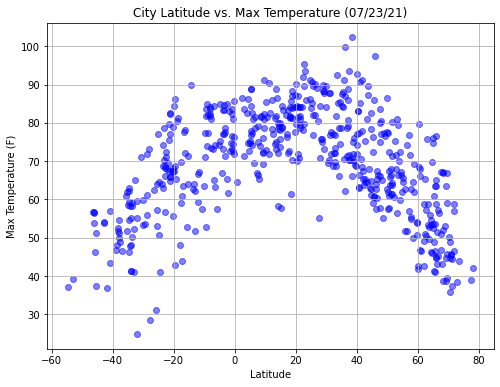

In [12]:
# Latitude vs. Temperature Plot
plt.figure(figsize=(8,6))
plt.scatter(df_countries_weather["Lat"], df_countries_weather["Max Temp"], color='b', alpha=0.5)
plt.grid()
plt.title(f'City Latitude vs. Max Temperature ({datetime.datetime.now().strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../Images/Latitude_vs_Max_Temp.png")
plt.show

## Latitude vs. Humidity Plot

Most of the humidity is clustered between -40 to 60 latitude points and most of the humidity is between 50 percent and 90 percent.

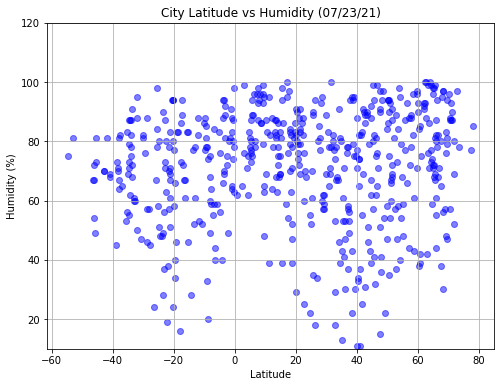

In [13]:
# Latitude vs. Humidity Plot
plt.figure(figsize=(8,6))
plt.scatter(df_countries_weather["Lat"], df_countries_weather["Humidity"], color='blue', alpha=0.5)
plt.ylim(10,120)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.datetime.now().strftime("%D")})')
plt.savefig("../Images/Latitude_vs_Humidity.png")
plt.show()


## Latitude vs. Cloudiness Plot

There does not look to be anything much to interpret here other than a greater percentage of cloudiness data points when close to 100 percent cloudiness.

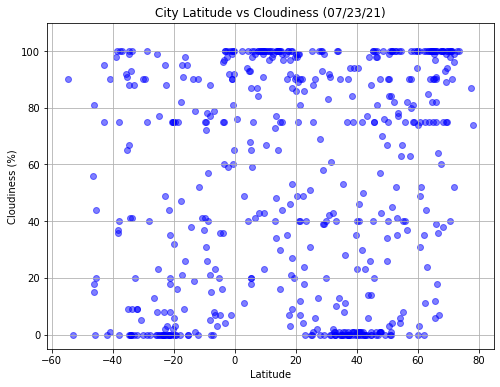

In [14]:
# Latitude vs. Cloudiness Plot
plt.figure(figsize=(8,6))
plt.scatter(df_countries_weather["Lat"], df_countries_weather["Cloudiness"], color='b', alpha=0.5)
plt.grid()
plt.ylim(-5,(df_countries_weather["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.datetime.now().strftime("%D")})')
plt.savefig("../Images/Latitude_vs_Cloudiness.png")
plt.show()


## Latitude vs. Wind Speed Plot

The wind speed tends to be clustered between 2 mph and 10 mph across the latitude spanning from -40 to 70.

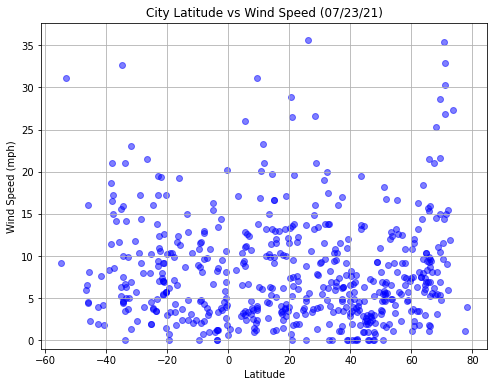

In [15]:
# Latitude vs. Wind Speed Plot
plt.figure(figsize=(8,6))
plt.scatter(df_countries_weather["Lat"], df_countries_weather["Wind Speed"], color='blue', alpha=0.5)
plt.grid()
plt.ylim((df_countries_weather["Wind Speed"].min()-1),(df_countries_weather["Wind Speed"].max()+2))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.datetime.now().strftime("%D")})')
plt.savefig("../Images/Latitude_vs_Wind_Speed.png")
plt.show()


## Linear Regression

In [16]:
# Run linear regression on each relationship. This time, separate the plots into 
# Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
# Southern Hemisphere (less than 0 degrees latitude).

In [17]:
North_Hemi = df_countries_weather.loc[df_countries_weather["Lat"]>= 0]
North_Hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,bethel,41.3712,-73.4140,70.68,82.0,1.0,0.00,US,1627093922
5,dikson,73.5069,80.5464,43.90,78.0,100.0,27.36,RU,1627093922
6,port-cartier,50.0334,-66.8654,62.74,84.0,67.0,3.13,CA,1627093627
9,barrow,71.2906,-156.7887,37.42,87.0,90.0,14.97,US,1627093921
10,cogealac,44.5500,28.5667,61.05,62.0,0.0,6.33,RO,1627093923


In [18]:
South_Hemi = df_countries_weather.loc[df_countries_weather["Lat"]< 0]
South_Hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-33.9258,18.4232,48.11,82.0,0.0,3.44,ZA,1627093921
1,busselton,-33.6500,115.3333,59.04,72.0,100.0,14.14,AU,1627093921
2,mar del plata,-38.0023,-57.5575,51.13,64.0,0.0,21.00,AR,1627093655
3,bluff,-46.6000,168.3333,56.80,67.0,56.0,5.93,NZ,1627093922
7,sao joao da barra,-21.6403,-41.0511,67.46,70.0,0.0,7.99,BR,1627093191


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared is only .39 between max temperature and latitude which indicates there is not a strong relationship between those two variables.

The r-squared is: 0.47254728441129734


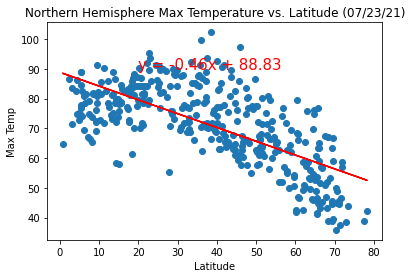

In [19]:
# Create a scatter plot of the x and y values for the Northern Hemisphere.
x_values = North_Hemi["Lat"]
y_values = North_Hemi["Max Temp"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'Northern Hemisphere Max Temperature vs. Latitude ({datetime.datetime.now().strftime("%D")})')
plt.annotate(line_eq,(20,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Linear Regression North Hemi Max Temp vs. Lat.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared is .58 between max temperature and latitude. The relationship is not a strong between those two variables.

The r-squared is: 0.4770080432290784


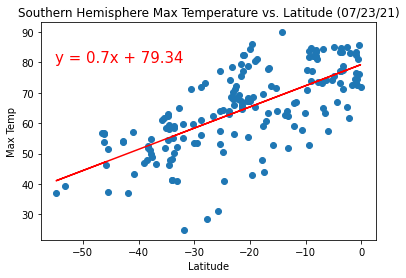

In [20]:
# Create a scatter plot of the x and y values for the Southern Hemisphere.
x_values = South_Hemi["Lat"]
y_values = South_Hemi["Max Temp"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'Southern Hemisphere Max Temperature vs. Latitude ({datetime.datetime.now().strftime("%D")})')
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Linear Regression South Hemi Max Temp vs. Lat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared is just 0.0048 which indicates the relationship between humidity and latitude is almost non-existent.

The r-squared is: 0.0006035140654974993


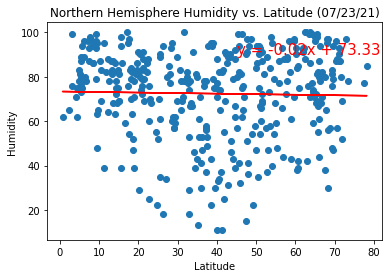

In [21]:
# Create a scatter plot of the x and y values for the Northern Hemisphere.
x_values = North_Hemi["Lat"]
y_values = North_Hemi["Humidity"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'Northern Hemisphere Humidity vs. Latitude ({datetime.datetime.now().strftime("%D")})')
plt.annotate(line_eq,(45,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Linear Regression North Hemi Humidity vs. Lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared is just .013 so the relationship between humidity and latitude is almost non-existent.

The r-squared is: 0.0021528556851889455


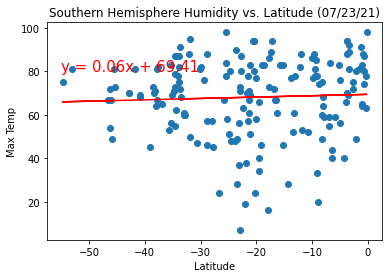

In [22]:
# Create a scatter plot of the x and y values for the Southern Hemisphere.
x_values = South_Hemi["Lat"]
y_values = South_Hemi["Humidity"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'Southern Hemisphere Humidity vs. Latitude ({datetime.datetime.now().strftime("%D")})')
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Linear Regression South Hemi Humidity vs. Lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared at .0088 is so low that the relationship between cloudiness and latitude is almost non-existent.

The r-squared is: 0.0009045443954118635


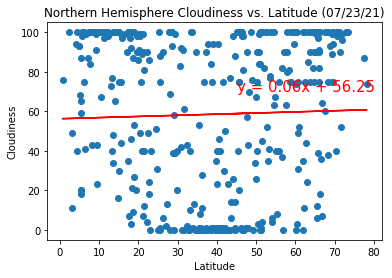

In [23]:
# Create a scatter plot of the x and y values for the Northern Hemisphere.
x_values = North_Hemi["Lat"]
y_values = North_Hemi["Cloudiness"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'Northern Hemisphere Cloudiness vs. Latitude ({datetime.datetime.now().strftime("%D")})')
plt.annotate(line_eq,(45,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Linear Regression North Hemi Cloudiness vs. Lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared is just 0.00188 and this indicates the relationship between cloudiness and latitude is almost non-existent.

The r-squared is: 0.019958443776558584


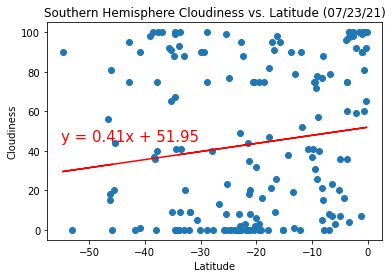

In [24]:
# Create a scatter plot of the x and y values for the Southern Hemisphere.
x_values = South_Hemi["Lat"]
y_values = South_Hemi["Cloudiness"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'Southern Hemisphere Cloudiness vs. Latitude ({datetime.datetime.now().strftime("%D")})')
plt.annotate(line_eq,(-55,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Linear Regression South Hemi Cloudiness vs. Lat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

An R-sqared of 3.53e-05 is so low R-squared and this indicates the relationship between wind speed and latitude is almost non-existent.

The r-squared is: 0.002862202402421636


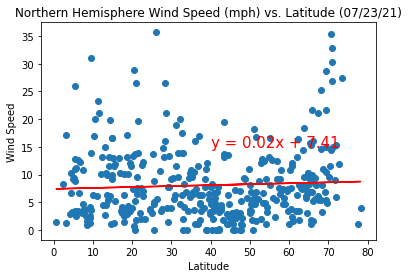

In [25]:
# Create a scatter plot of the x and y values for the Northern Hemisphere.
x_values = North_Hemi["Lat"]
y_values = North_Hemi["Wind Speed"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'Northern Hemisphere Wind Speed (mph) vs. Latitude ({datetime.datetime.now().strftime("%D")})')
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Linear Regression North Hemi Wind speed vs. Latitude.png")
plt.show()



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

An R-sqared of .0265 is very low R-squared and this indicates the relationship between wind speed and latitude is almost non-existent.

The r-squared is: 0.05728142541681661


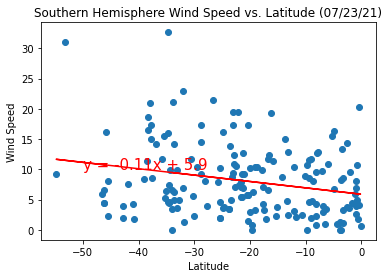

In [26]:
# Create a scatter plot of the x and y values for the Southern Hemisphere.
x_values = South_Hemi["Lat"]
y_values = South_Hemi["Wind Speed"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'Southern Hemisphere Wind Speed vs. Latitude ({datetime.datetime.now().strftime("%D")})')
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Linear Regression South Hemi Wind speed vs. Latitude.png")
plt.show()